In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

d:\Study_Tutorials\Agentic_AI_Concepts_using_Langgraph\myenv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [2]:
load_dotenv()

True

In [3]:
class llm_state(TypedDict):
    ques:str
    ans:str

In [4]:
model=ChatGoogleGenerativeAI(
    model='gemini-2.5-flash'
)

In [5]:
def generate_answer(state:llm_state)->llm_state:
    ques=state['ques']
    prompt=f'Answer the following question: {ques}'
    res=model.invoke(prompt).content
    state['ans']=res
    return state

In [6]:
#Define graph
graph=StateGraph(llm_state)

graph.add_node('generate_answer',generate_answer)

graph.add_edge(START,'generate_answer')
graph.add_edge('generate_answer',END)

workflow=graph.compile()

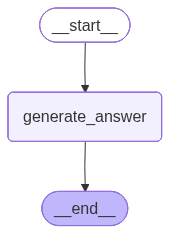

In [7]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [8]:
initial_state={'ques':'What is the height of mt. everest'}
final_state=workflow.invoke(initial_state)
print(final_state['ans'])

The official height of Mount Everest, as agreed upon by China and Nepal in 2020, is **8,848.86 meters (29,031.7 feet)** above sea level.

This updated measurement includes the snow cap.
